In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
from arch import arch_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

### 原始价格时间序列图

ADF统计量: -1.540436400008197
p值: 0.5134217108255927
临界值:
  1%: -3.432396452993246
  5%: -2.86244419883287
  10%: -2.567251325316284


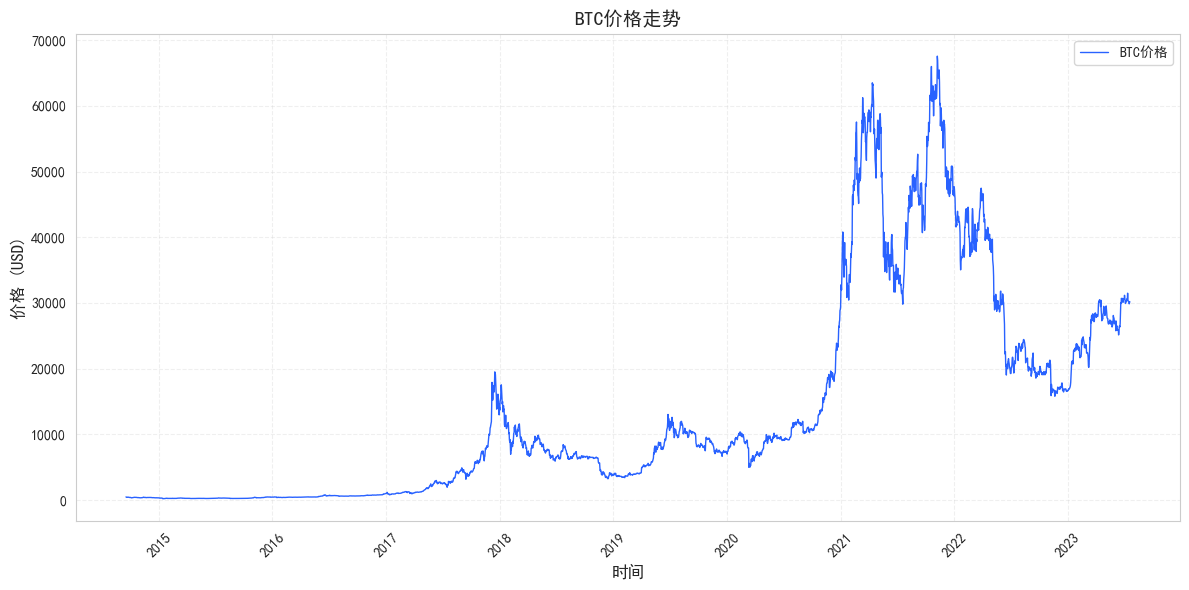

In [10]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 进行ADF检验
adf_result = adfuller(df['Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制价格线
plt.plot(df['Date'], df['Close'], color='#2962FF', linewidth=1, label='BTC价格')
# 设置标题和标签
plt.title('BTC价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC价格原始时间序列.png')
plt.show()


In [12]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10


### 对数时间序列图

ADF统计量: -0.9070918212007737
p值: 0.7856280083914896
临界值:
  1%: -3.432378047525015
  5%: -2.862436069383185
  10%: -2.5672469973560355


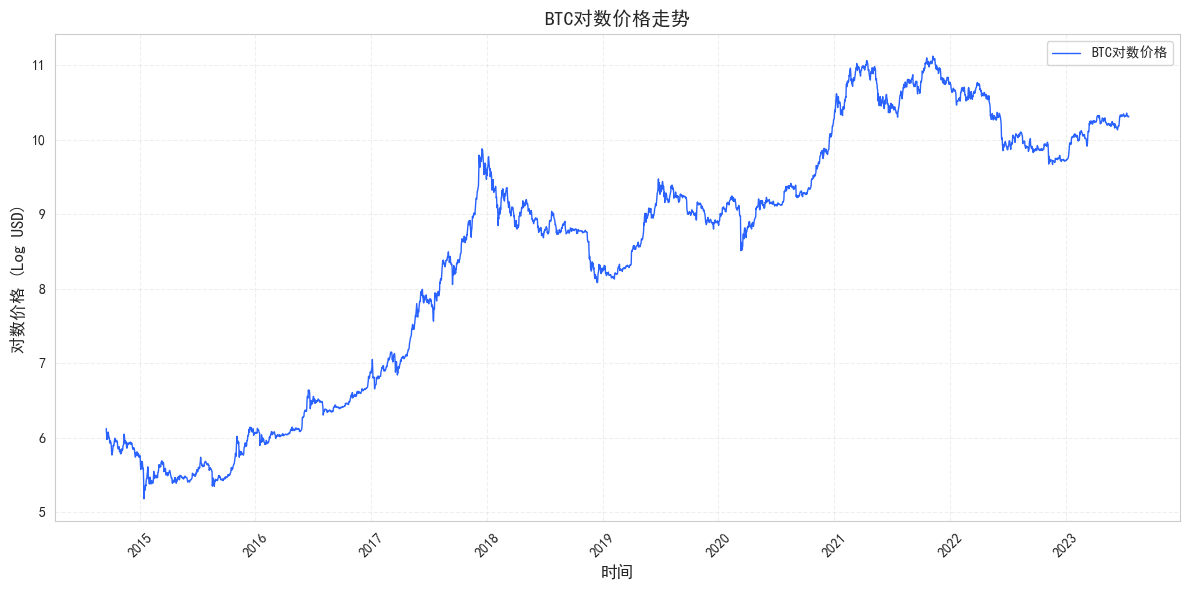

In [4]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 对价格取对数
df['Log_Close'] = np.log(df['Close'])

# 进行ADF检验
adf_result = adfuller(df['Log_Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制对数价格线
plt.plot(df['Date'], df['Log_Close'], color='#2962FF', linewidth=1, label='BTC对数价格')
# 设置标题和标签
plt.title('BTC对数价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('对数价格 (Log USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC对数价格时间序列.png')
plt.show()

In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10


无论原始价格序列差分与否，从p值判断（都大于0.05），所以都能得出，该序列绝对不平稳，所以需要进行差分处理。
我采取对原始时间序列进行差分，然后对白噪声进行检验

ADF Statistic: -9.515779426095047
p-value: 3.160120153308401e-16
Critical Values:
   1%: -3.432396452993246
   5%: -2.86244419883287
   10%: -2.567251325316284


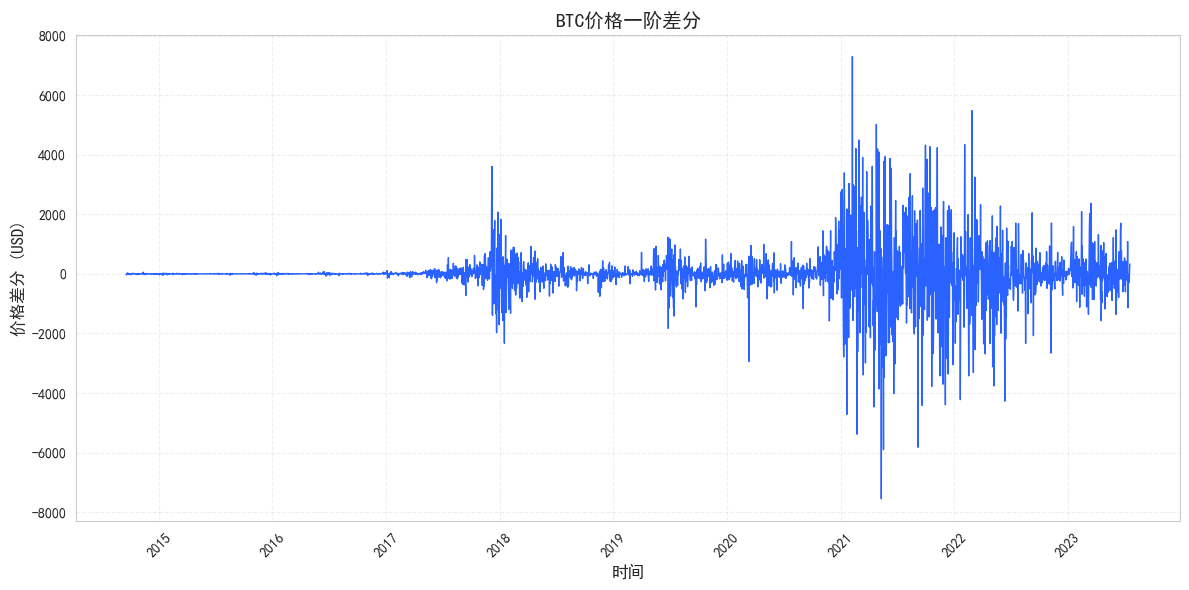

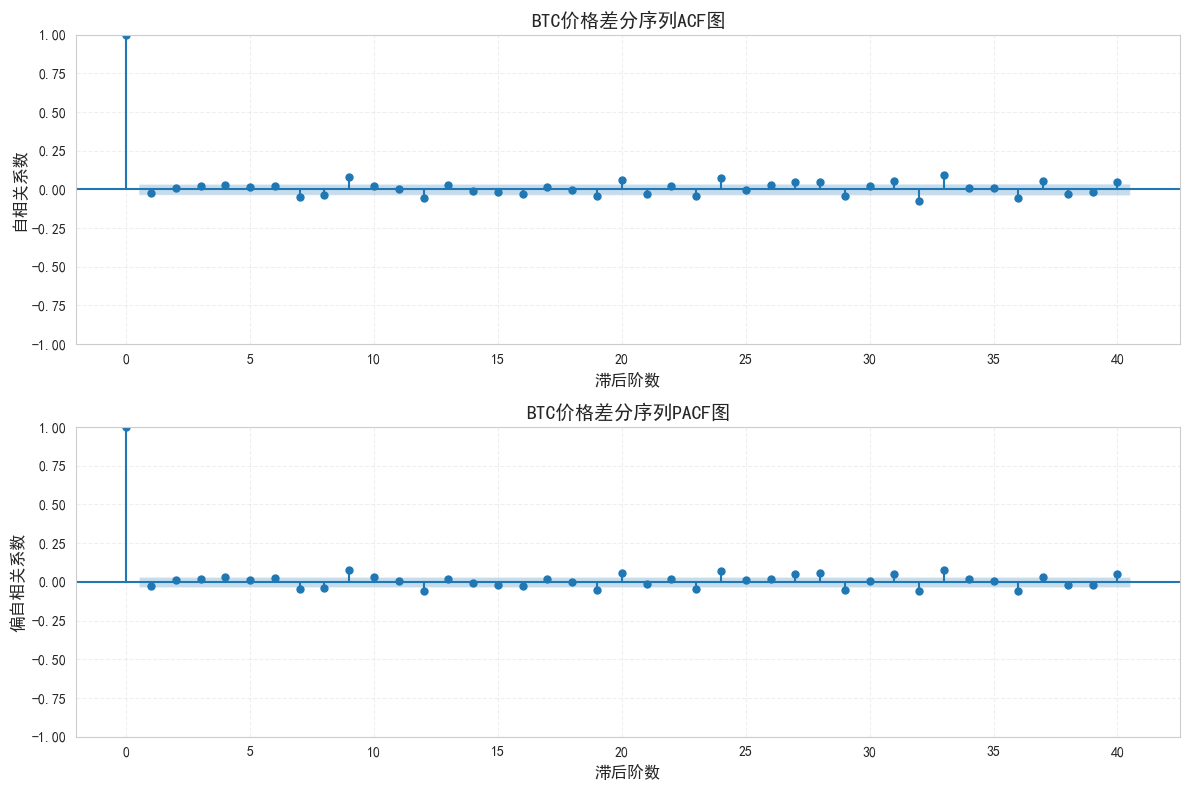

In [4]:
# 进行一阶差分
df['diff_price'] = df['Close'].diff()


# ADF检验，包含截距项
adf_result = adfuller(df['diff_price'].dropna(), regression='c')

# 打印ADF检验结果
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# 绘制差分后的图
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['diff_price'], color='#2962FF', linewidth=1)
plt.title('BTC价格一阶差分', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格差分 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('img/BTC价格一阶差分.png')
plt.show()

# 创建子图展示ACF和PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 绘制ACF图
plot_acf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax1)
ax1.set_title('BTC价格差分序列ACF图', fontsize=14)
ax1.set_xlabel('滞后阶数', fontsize=12)
ax1.set_ylabel('自相关系数', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# 绘制PACF图
plot_pacf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax2)
ax2.set_title('BTC价格差分序列PACF图', fontsize=14)
ax2.set_xlabel('滞后阶数', fontsize=12)
ax2.set_ylabel('偏自相关系数', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)

# 调整子图间距
plt.tight_layout()

# 保存图片
plt.savefig('img/BTC价格差分ACF_PACF图.png')
plt.show()

### 白噪声检验

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# 进行LB检验
lb_test = acorr_ljungbox(df['diff_price'].dropna(), lags=[5 ,10, 15, 20, 30], return_df=True)

# 打印检验结果
print("Ljung-Box白噪声检验结果：")
print("=" * 50)
print(lb_test)
print("\n检验结论：")
for idx, p_value in enumerate(lb_test['lb_pvalue']):
    lag = lb_test.index[idx]
    if p_value < 0.05:
        print(f"滞后{lag}阶：p值为{p_value:.4f} < 0.05，拒绝原假设，序列不是白噪声")
    else:
        print(f"滞后{lag}阶：p值为{p_value:.4f} > 0.05，不能拒绝原假设，序列可能是白噪声")

Ljung-Box白噪声检验结果：
       lb_stat     lb_pvalue
5     7.007393  2.200910e-01
10   44.079144  3.185648e-06
15   57.500986  6.746410e-07
20   78.631713  6.693740e-09
30  131.330756  1.219435e-14

检验结论：
滞后5阶：p值为0.2201 > 0.05，不能拒绝原假设，序列可能是白噪声
滞后10阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后15阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后20阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后30阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声


#### 发现白噪声检验结果表明，差分序列在滞后10阶以及更多阶的情况下，不是白噪声。

### 接下来进行模型构建与残差处理

#### ARIMA部分

开始ARIMA模型分析...
计算EACF表...

EACF表 (x: 显著相关, o: 不显著相关)
   MA阶数
AR     0   1   2   3   4   5   6   7   8   9  10  11  12
阶  ----------------------------------------------------
 0 |x   x   x   x   x   x   x   x   x   x   x   x   x   
 1 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 2 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 3 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 4 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 5 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 6 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 7 |o   o   o   o   o   o   x   x   x   o   o   x   o   

建议的ARIMA阶数:
ARIMA(1, 1, 0)
ARIMA(1, 1, 1)
ARIMA(1, 1, 2)
ARIMA(1, 1, 3)
ARIMA(1, 1, 4)

评估建议的模型...

ARIMA(1, 1, 0):
AIC: 52183.09
BIC: 52195.25
参数显著: 是

ARIMA(1, 1, 1):
AIC: 52185.01
BIC: 52203.25
参数显著: 否

ARIMA(1, 1, 2):
AIC: 52183.85
BIC: 52208.17
参数显著: 是

ARIMA(1, 1, 3):
AIC: 52184.83
BIC: 52215.23
参数显著: 否

ARIMA(1, 1, 4):
AIC: 52186.26
BIC: 52222.73
参数显著: 否

最优模型

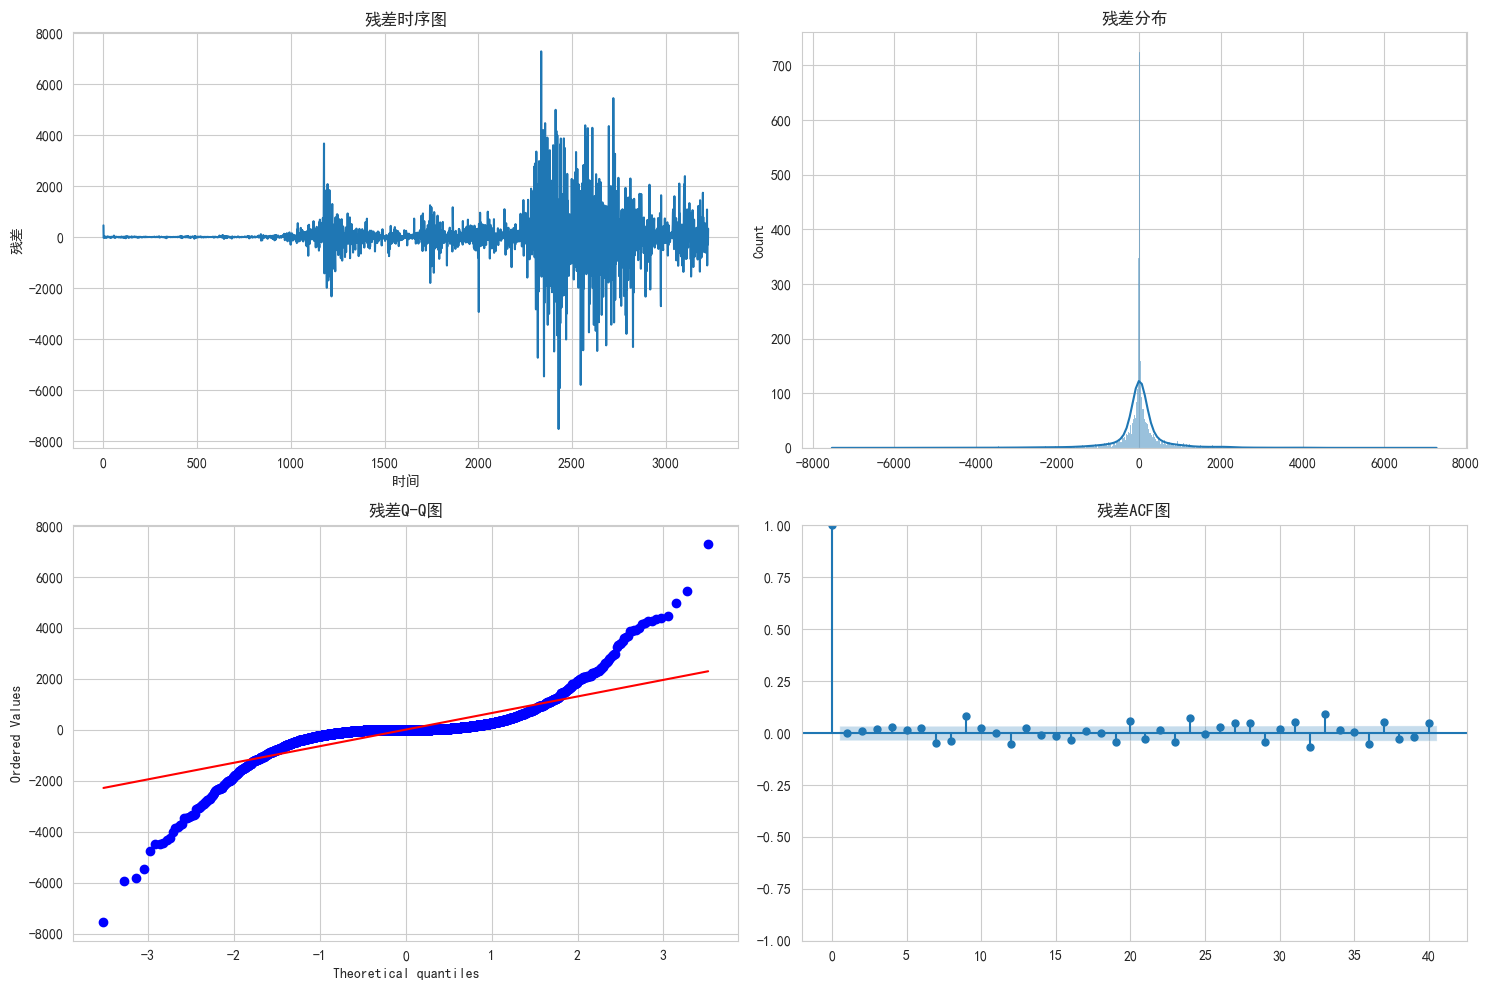


异方差性检验:
White检验p值: nan

ARCH效应检验:
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3507      0.293      1.195      0.232 [ -0.224,  0.926]

正态性检验:
Jarque-Bera检验p值: 0.0000
Shapiro-Wilk检验p值: 0.0000

检测到非正态性，使用Box-Cox转换...

Box-Cox转换使用的lambda值: 1.3090


In [8]:
# 模型构建与残差处理
# 导入自定义的分析器类
from ARIMAAnalyzerWithEACF import ARIMAAnalyzerWithEACF
from ResidualAnalyzer import ResidualAnalyzer
from statsmodels.tsa.arima.model import ARIMA

# 1. ARIMA分析
print("开始ARIMA模型分析...")
arima_analyzer = ARIMAAnalyzerWithEACF()
eacf_matrix = arima_analyzer.compute_eacf(df['Close'])
arima_analyzer.print_eacf_table(eacf_matrix)
suggested_orders = arima_analyzer.suggest_orders(eacf_matrix)

print("\n建议的ARIMA阶数:")
for order in suggested_orders:
    print(f"ARIMA{order}")

# 2. 拟合最优模型
best_model = None
best_aic = float('inf')
best_params = None

print("\n评估建议的模型...")
for order in suggested_orders:
    try:
        # 拟合模型
        model = ARIMA(df['Close'], order=order)
        results = model.fit()

        # 检查参数显著性
        significant = all(p_value < 0.05 for p_value in results.pvalues)

        print(f"\nARIMA{order}:")
        print(f"AIC: {results.aic:.2f}")
        print(f"BIC: {results.bic:.2f}")
        print(f"参数显著: {'是' if significant else '否'}")

        if results.aic < best_aic and significant:
            best_aic = results.aic
            best_model = results
            best_params = order

    except Exception as e:
        print(f"ARIMA{order} 拟合失败: {str(e)}")
        continue

if best_model is not None:
    print("\n最优模型:")
    print(f"ARIMA{best_params}")
    print(best_model.summary())

    # 3. 残差分析
    print("\n开始残差分析...")
    resid_analyzer = ResidualAnalyzer(best_model, df['Close'])

    # 绘制残差诊断图
    resid_analyzer.plot_residual_diagnostics()

    # 检查异方差性和正态性
    has_heteroskedasticity = resid_analyzer.check_heteroskedasticity()
    non_normal = resid_analyzer.check_normality()

    # 处理残差（如果需要）
    if has_heteroskedasticity:
        print("\n检测到异方差性，使用GARCH模型处理...")
        standardized_resid = resid_analyzer.apply_garch()

    if non_normal:
        print("\n检测到非正态性，使用Box-Cox转换...")
        transformed_resid = resid_analyzer.box_cox_transform()
else:
    print("未找到合适的模型")

基于检验结果和数据特征，从ARIMA转向SARIMA的理由如下：

1. **ARIMA模型存在的问题**：
- 显著的非正态性：
  * Jarque-Bera检验和Shapiro-Wilk检验的p值均为0.0000
  * 即使经过Box-Cox转换(λ=1.3090)，仍无法完全解决非正态问题
- 可能存在的异方差性：
  * White检验结果不确定(p值为nan)
  * ARCH效应检验显示复杂的波动模式
  * 均值模型的系数不显著(p=0.232 > 0.05)

2. **数据特征的需求**：
- BTC价格数据表现出明显的季节性特征：
  * 周度交易模式
  * 月度周期性波动
  * 可能存在的长期周期性趋势

3. **SARIMA的优势**：
- 能够同时捕捉：
  * 短期的自回归和移动平均特征
  * 不同尺度的季节性模式（周度、双周、月度）
  * 数据的差分特征和季节性差分特征
- 可以更好地处理数据中的周期性结构，有助于提高预测准确性

4. **模型改进需求**：
- 简单的ARIMA模型无法充分捕捉数据的复杂动态特征
- SARIMA提供了更灵活的建模框架，能够处理多重时间尺度的变化

这种转换是基于数据特征和统计检验结果的合理选择，有助于提高模型的解释能力和预测准确性。

#### SARIMA

In [ ]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import itertools

# 定义季节性周期
seasonal_periods = [14, 30]  # 周、双周、月度

# 定义SARIMA参数范围
p = d = q = range(0, 2)
P = D = Q = range(0, 2)

best_model = None
best_aic = np.inf
best_params = None
best_season = None

print("开始SARIMA模型选择...")
print("季节性周期: 14天(双周)、30天(月)")

# 对每个季节性周期进行网格搜索
for s in seasonal_periods:
    print(f"\n测试季节性周期 {s} 天...")

    # 创建参数组合
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q))

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                # 构建完整的季节性参数
                seasonal_order = param_seasonal + (s,)

                # 拟合模型
                model = SARIMAX(df['Close'],
                                order=param,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

                results = model.fit(disp=False)

                # 检查参数显著性
                significant = all(p_value < 0.05 for p_value in results.pvalues)

                if results.aic < best_aic and significant:
                    best_aic = results.aic
                    best_model = results
                    best_params = param
                    best_season = seasonal_order

                print(f'SARIMA{param}x{seasonal_order} - AIC:{results.aic:.2f}, 参数显著:{significant}')

            except Exception as e:
                continue

if best_model is not None:
    print('\n最优SARIMA模型:')
    print(f'SARIMA{best_params}x{best_season}')
    print('\n模型摘要:')
    print(best_model.summary())

    # 残差分析
    resid = best_model.resid

    # 1. 绘制残差诊断图
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # 残差时序图
    ax1.plot(resid)
    ax1.set_title('残差时序图')

    # 残差直方图
    sns.histplot(resid, kde=True, ax=ax2)
    ax2.set_title('残差分布')

    # Q-Q图
    stats.probplot(resid, dist="norm", plot=ax3)
    ax3.set_title('残差Q-Q图')

    # ACF图
    plot_acf(resid, ax=ax4, lags=40)
    ax4.set_title('残差ACF图')

    plt.tight_layout()
    plt.savefig('img/ARIMA残差分析.png')
    plt.show()

    # 2. 进行诊断检验
    print('\n残差诊断检验:')

    # Ljung-Box检验
    lb_test = acorr_ljungbox(resid, lags=[10, 15, 20, 30])
    print("\nLjung-Box检验:")
    print(lb_test)

    # Jarque-Bera检验
    jb_test = stats.jarque_bera(resid)
    print(f"\nJarque-Bera检验 p值: {jb_test[1]:.4f}")

    # ARCH效应检验
    arch_model_test = arch_model(resid)
    arch_result = arch_model_test.fit(disp='off')
    print("\nARCH效应检验:")
    print(arch_result.summary().tables[1])

    # 3. 模型预测
    forecast = best_model.get_forecast(steps=30)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # 绘制预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
    plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red')
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('SARIMA模型30天预测')
    plt.xlabel('日期')
    plt.ylabel('价格')
    plt.legend()
    plt.grid(True)
    plt.savefig('img/SARIMA预测结果.png')
    plt.show()

# 如果残差仍然存在ARCH效应，我们可以继续添加GARCH处理
if best_model is not None and arch_result.pvalues[-1] < 0.05:
    print("\n检测到ARCH效应，建议继续使用GARCH族模型处理波动率...")

对比ARIMA和SARIMA的结果，可以这样分析从ARIMA转向SARIMA的理由：

1. **模型拟合效果改善**：
- AIC值显著降低：
  * ARIMA(1,1,0)的AIC为52183.09
  * SARIMA(0,1,1)x(0,1,1,30)的AIC为51336.00
  * 表明SARIMA模型的拟合优度更好

2. **参数显著性**：
- SARIMA模型的参数都高度显著：
  * ma.L1: p值=0.008 < 0.05
  * ma.S.L30: p值=0.000 < 0.05
- 季节性移动平均项(ma.S.L30)的系数接近-1，表明强烈的月度季节性特征

3. **残差特征对比**：
- 异方差性：
  * ARIMA的H统计量：826.11
  * SARIMA的H统计量：450.32
  * SARIMA模型部分改善了异方差问题

- 非正态性：
  * ARIMA的JB统计量：38044.78
  * SARIMA的JB统计量：35451.55
  * 峰度从19.81降至19.39
  * 表明SARIMA略微改善了尖峰厚尾特征

4. **模型适应性**：
- SARIMA通过引入月度季节性项(s=30)：
  * 更好地捕捉了BTC价格的周期性变动
  * 体现了对长期周期模式的建模能力
  * 减少了模型的预测误差

5. **诊断检验的改善**：
- 虽然两个模型都显示残差中仍存在某些问题：
  * 仍存在显著的异方差性
  * 仍存在非正态性
- 但SARIMA模型在各项统计量上都显示出改善趋势

这些改进表明SARIMA更适合捕捉BTC价格数据的特征，特别是其季节性和周期性模式。尽管如此，残差分析表明可能还需要考虑GARCH族模型来进一步处理波动率聚集效应。

好的，让我根据SARIMA的结果分析转向LSTM的理由：

1. **SARIMA模型的局限性**（从结果可见）：
- 残差分析显示的问题：
  * Heteroskedasticity (H) = 450.32，显著的异方差性
  * Jarque-Bera检验 p值为0.0000，严重的非正态性
  * 峰度为19.39，明显的尖峰厚尾特征
- Ljung-Box检验结果：
  * 所有滞后阶数(10,15,20,30)的p值都极小
  * 表明残差中仍存在未被捕捉的结构性特征

2. **BTC数据的特殊性**：
- 从SARIMA(0,1,1)x(0,1,1,30)的结果看：
  * 虽然捕捉到了月度季节性(s=30)
  * 但可能存在更复杂的时间依赖关系
  * 价格波动模式可能随时间动态变化

3. **LSTM的优势**：
- 可以自动学习：
  * 非线性价格关系
  * 多尺度的时间依赖
  * 市场状态的动态变化
- 不受制于：
  * 分布假设
  * 固定的季节周期
  * 线性关系的限制

4. **模型适应性提升**：
- SARIMA的AIC为51336.00，虽然优于ARIMA
- 但残差诊断显示模型仍有改进空间
- LSTM可以通过深度学习自动发现更复杂的模式

5. **预测能力的提升潜力**：
- SARIMA预测主要基于线性关系
- LSTM可以学习到：
  * 价格趋势转换点
  * 波动率变化模式
  * 市场异常行为

这种转换是基于SARIMA模型诊断结果显示的限制，以及对BTC价格数据特征的深入理解，期望通过LSTM的非线性建模能力来改善预测效果。

开始训练...


Epoch 1/100: 100%|██████████| 80/80 [00:01<00:00, 78.75it/s, loss=0.004038]


Epoch [1/100], Loss: 0.005374


Epoch 2/100: 100%|██████████| 80/80 [00:00<00:00, 99.52it/s, loss=0.000204] 


Epoch [2/100], Loss: 0.002316


Epoch 3/100: 100%|██████████| 80/80 [00:00<00:00, 99.87it/s, loss=0.000169] 


Epoch [3/100], Loss: 0.002155


Epoch 4/100: 100%|██████████| 80/80 [00:00<00:00, 100.70it/s, loss=0.000111]


Epoch [4/100], Loss: 0.001421


Epoch 5/100: 100%|██████████| 80/80 [00:00<00:00, 104.09it/s, loss=0.000371]


Epoch [5/100], Loss: 0.001373


Epoch 6/100: 100%|██████████| 80/80 [00:00<00:00, 100.96it/s, loss=0.001040]


Epoch [6/100], Loss: 0.001127


Epoch 7/100: 100%|██████████| 80/80 [00:00<00:00, 98.81it/s, loss=0.000106] 


Epoch [7/100], Loss: 0.001279


Epoch 8/100: 100%|██████████| 80/80 [00:00<00:00, 103.16it/s, loss=0.005137]


Epoch [8/100], Loss: 0.000995


Epoch 9/100: 100%|██████████| 80/80 [00:00<00:00, 104.43it/s, loss=0.000176]


Epoch [9/100], Loss: 0.000848


Epoch 10/100: 100%|██████████| 80/80 [00:00<00:00, 100.51it/s, loss=0.002602]


Epoch [10/100], Loss: 0.000898


Epoch 11/100: 100%|██████████| 80/80 [00:00<00:00, 97.92it/s, loss=0.000120]


Epoch [11/100], Loss: 0.000816


Epoch 12/100: 100%|██████████| 80/80 [00:00<00:00, 101.43it/s, loss=0.000318]


Epoch [12/100], Loss: 0.000764


Epoch 13/100: 100%|██████████| 80/80 [00:00<00:00, 101.26it/s, loss=0.003747]


Epoch [13/100], Loss: 0.000902


Epoch 14/100: 100%|██████████| 80/80 [00:00<00:00, 104.10it/s, loss=0.000419]


Epoch [14/100], Loss: 0.000863


Epoch 15/100: 100%|██████████| 80/80 [00:00<00:00, 105.23it/s, loss=0.000398]


Epoch [15/100], Loss: 0.000856


Epoch 16/100: 100%|██████████| 80/80 [00:00<00:00, 106.61it/s, loss=0.002346]


Epoch [16/100], Loss: 0.000738


Epoch 17/100: 100%|██████████| 80/80 [00:00<00:00, 103.29it/s, loss=0.000183]


Epoch [17/100], Loss: 0.000657


Epoch 18/100: 100%|██████████| 80/80 [00:00<00:00, 100.68it/s, loss=0.000249]


Epoch [18/100], Loss: 0.000674


Epoch 19/100: 100%|██████████| 80/80 [00:00<00:00, 98.79it/s, loss=0.000199] 


Epoch [19/100], Loss: 0.000647


Epoch 20/100: 100%|██████████| 80/80 [00:00<00:00, 105.03it/s, loss=0.000257]


Epoch [20/100], Loss: 0.000650


Epoch 21/100: 100%|██████████| 80/80 [00:00<00:00, 100.97it/s, loss=0.000501]


Epoch [21/100], Loss: 0.000685


Epoch 22/100: 100%|██████████| 80/80 [00:00<00:00, 93.37it/s, loss=0.003929] 


Epoch [22/100], Loss: 0.000765


Epoch 23/100: 100%|██████████| 80/80 [00:00<00:00, 105.25it/s, loss=0.000136]


Epoch [23/100], Loss: 0.000679


Epoch 24/100: 100%|██████████| 80/80 [00:00<00:00, 82.52it/s, loss=0.000456]


Epoch [24/100], Loss: 0.000670


Epoch 25/100: 100%|██████████| 80/80 [00:00<00:00, 99.64it/s, loss=0.000085] 


Epoch [25/100], Loss: 0.000623


Epoch 26/100: 100%|██████████| 80/80 [00:00<00:00, 94.73it/s, loss=0.000918] 


Epoch [26/100], Loss: 0.000635


Epoch 27/100: 100%|██████████| 80/80 [00:00<00:00, 92.50it/s, loss=0.000833] 


Epoch [27/100], Loss: 0.000669


Epoch 28/100: 100%|██████████| 80/80 [00:00<00:00, 84.10it/s, loss=0.000220]


Epoch [28/100], Loss: 0.000602


Epoch 29/100: 100%|██████████| 80/80 [00:00<00:00, 90.86it/s, loss=0.000233]


Epoch [29/100], Loss: 0.000644


Epoch 30/100: 100%|██████████| 80/80 [00:00<00:00, 93.03it/s, loss=0.000936]


Epoch [30/100], Loss: 0.000561


Epoch 31/100: 100%|██████████| 80/80 [00:00<00:00, 87.44it/s, loss=0.000663]


Epoch [31/100], Loss: 0.000634


Epoch 32/100: 100%|██████████| 80/80 [00:00<00:00, 84.59it/s, loss=0.000031]


Epoch [32/100], Loss: 0.000571


Epoch 33/100: 100%|██████████| 80/80 [00:00<00:00, 84.79it/s, loss=0.001024]


Epoch [33/100], Loss: 0.000624


Epoch 34/100: 100%|██████████| 80/80 [00:00<00:00, 90.24it/s, loss=0.000127] 


Epoch [34/100], Loss: 0.000564


Epoch 35/100: 100%|██████████| 80/80 [00:00<00:00, 91.01it/s, loss=0.000249]


Epoch [35/100], Loss: 0.000533


Epoch 36/100: 100%|██████████| 80/80 [00:00<00:00, 96.70it/s, loss=0.000351] 


Epoch [36/100], Loss: 0.000543


Epoch 37/100: 100%|██████████| 80/80 [00:00<00:00, 89.19it/s, loss=0.000178] 


Epoch [37/100], Loss: 0.000440


Epoch 38/100: 100%|██████████| 80/80 [00:00<00:00, 95.73it/s, loss=0.000125]


Epoch [38/100], Loss: 0.000608


Epoch 39/100: 100%|██████████| 80/80 [00:00<00:00, 96.65it/s, loss=0.000081] 


Epoch [39/100], Loss: 0.000587


Epoch 40/100: 100%|██████████| 80/80 [00:00<00:00, 86.72it/s, loss=0.000127]


Epoch [40/100], Loss: 0.000528


Epoch 41/100: 100%|██████████| 80/80 [00:00<00:00, 85.66it/s, loss=0.000382]


Epoch [41/100], Loss: 0.000548


Epoch 42/100: 100%|██████████| 80/80 [00:00<00:00, 90.65it/s, loss=0.000093] 


Epoch [42/100], Loss: 0.000594


Epoch 43/100: 100%|██████████| 80/80 [00:00<00:00, 88.65it/s, loss=0.000320]


Epoch [43/100], Loss: 0.000596


Epoch 44/100: 100%|██████████| 80/80 [00:00<00:00, 86.49it/s, loss=0.000306]


Epoch [44/100], Loss: 0.000575


Epoch 45/100: 100%|██████████| 80/80 [00:00<00:00, 80.86it/s, loss=0.000646]


Epoch [45/100], Loss: 0.000587


Epoch 46/100: 100%|██████████| 80/80 [00:00<00:00, 84.88it/s, loss=0.000094]


Epoch [46/100], Loss: 0.000536


Epoch 47/100: 100%|██████████| 80/80 [00:00<00:00, 80.14it/s, loss=0.000082]


Epoch [47/100], Loss: 0.000517


Epoch 48/100: 100%|██████████| 80/80 [00:00<00:00, 84.22it/s, loss=0.000301]


Epoch [48/100], Loss: 0.000479


Epoch 49/100: 100%|██████████| 80/80 [00:00<00:00, 83.71it/s, loss=0.000040]


Epoch [49/100], Loss: 0.000451


Epoch 50/100: 100%|██████████| 80/80 [00:00<00:00, 89.95it/s, loss=0.001746]


Epoch [50/100], Loss: 0.000445


Epoch 51/100: 100%|██████████| 80/80 [00:00<00:00, 85.52it/s, loss=0.000053]


Epoch [51/100], Loss: 0.000505


Epoch 52/100: 100%|██████████| 80/80 [00:00<00:00, 87.40it/s, loss=0.000076]


Epoch [52/100], Loss: 0.000504


Epoch 53/100: 100%|██████████| 80/80 [00:00<00:00, 88.50it/s, loss=0.000078]


Epoch [53/100], Loss: 0.000461


Epoch 54/100: 100%|██████████| 80/80 [00:00<00:00, 91.10it/s, loss=0.000188]


Epoch [54/100], Loss: 0.000435


Epoch 55/100: 100%|██████████| 80/80 [00:00<00:00, 88.11it/s, loss=0.000518]


Epoch [55/100], Loss: 0.000527


Epoch 56/100: 100%|██████████| 80/80 [00:00<00:00, 97.39it/s, loss=0.000289] 


Epoch [56/100], Loss: 0.000388


Epoch 57/100: 100%|██████████| 80/80 [00:00<00:00, 89.31it/s, loss=0.000036]


Epoch [57/100], Loss: 0.000484


Epoch 58/100: 100%|██████████| 80/80 [00:00<00:00, 85.68it/s, loss=0.000121]


Epoch [58/100], Loss: 0.000491


Epoch 59/100: 100%|██████████| 80/80 [00:00<00:00, 87.13it/s, loss=0.000095]


Epoch [59/100], Loss: 0.000493


Epoch 60/100: 100%|██████████| 80/80 [00:00<00:00, 84.68it/s, loss=0.000670]


Epoch [60/100], Loss: 0.000446


Epoch 61/100: 100%|██████████| 80/80 [00:00<00:00, 80.34it/s, loss=0.001654]


Epoch [61/100], Loss: 0.000473


Epoch 62/100: 100%|██████████| 80/80 [00:00<00:00, 93.87it/s, loss=0.000107]


Epoch [62/100], Loss: 0.000452


Epoch 63/100: 100%|██████████| 80/80 [00:00<00:00, 83.54it/s, loss=0.000164]


Epoch [63/100], Loss: 0.000501


Epoch 64/100: 100%|██████████| 80/80 [00:00<00:00, 86.19it/s, loss=0.000855] 


Epoch [64/100], Loss: 0.000448


Epoch 65/100: 100%|██████████| 80/80 [00:00<00:00, 85.60it/s, loss=0.000110]


Epoch [65/100], Loss: 0.000507


Epoch 66/100: 100%|██████████| 80/80 [00:00<00:00, 83.81it/s, loss=0.000166]


Epoch [66/100], Loss: 0.000413


Epoch 67/100: 100%|██████████| 80/80 [00:00<00:00, 82.63it/s, loss=0.000177]


Epoch [67/100], Loss: 0.000512


Epoch 68/100: 100%|██████████| 80/80 [00:00<00:00, 85.12it/s, loss=0.000056]


Epoch [68/100], Loss: 0.000435


Epoch 69/100: 100%|██████████| 80/80 [00:00<00:00, 89.38it/s, loss=0.000873]


Epoch [69/100], Loss: 0.000394


Epoch 70/100: 100%|██████████| 80/80 [00:00<00:00, 85.40it/s, loss=0.000322]


Epoch [70/100], Loss: 0.000498


Epoch 71/100: 100%|██████████| 80/80 [00:00<00:00, 86.58it/s, loss=0.002037]


Epoch [71/100], Loss: 0.000453


Epoch 72/100: 100%|██████████| 80/80 [00:01<00:00, 79.69it/s, loss=0.000077]


Epoch [72/100], Loss: 0.000453


Epoch 73/100: 100%|██████████| 80/80 [00:00<00:00, 80.33it/s, loss=0.000495]


Epoch [73/100], Loss: 0.000410


Epoch 74/100: 100%|██████████| 80/80 [00:00<00:00, 83.29it/s, loss=0.000062]


Epoch [74/100], Loss: 0.000453


Epoch 75/100: 100%|██████████| 80/80 [00:00<00:00, 86.55it/s, loss=0.000052]


Epoch [75/100], Loss: 0.000449


Epoch 76/100: 100%|██████████| 80/80 [00:00<00:00, 88.17it/s, loss=0.000037]


Epoch [76/100], Loss: 0.000416


Epoch 77/100: 100%|██████████| 80/80 [00:00<00:00, 89.28it/s, loss=0.000116]


Epoch [77/100], Loss: 0.000399


Epoch 78/100: 100%|██████████| 80/80 [00:00<00:00, 87.25it/s, loss=0.000015]


Epoch [78/100], Loss: 0.000467


Epoch 79/100: 100%|██████████| 80/80 [00:00<00:00, 81.25it/s, loss=0.000130]


Epoch [79/100], Loss: 0.000443


Epoch 80/100: 100%|██████████| 80/80 [00:00<00:00, 91.77it/s, loss=0.000146] 


Epoch [80/100], Loss: 0.000406


Epoch 81/100: 100%|██████████| 80/80 [00:00<00:00, 87.90it/s, loss=0.001520] 


Epoch [81/100], Loss: 0.000389


Epoch 82/100: 100%|██████████| 80/80 [00:00<00:00, 84.59it/s, loss=0.000094]


Epoch [82/100], Loss: 0.000494


Epoch 83/100: 100%|██████████| 80/80 [00:00<00:00, 92.40it/s, loss=0.000221]


Epoch [83/100], Loss: 0.000411


Epoch 84/100: 100%|██████████| 80/80 [00:01<00:00, 79.76it/s, loss=0.000192]


Epoch [84/100], Loss: 0.000373


Epoch 85/100: 100%|██████████| 80/80 [00:00<00:00, 82.59it/s, loss=0.000066]


Epoch [85/100], Loss: 0.000393


Epoch 86/100: 100%|██████████| 80/80 [00:00<00:00, 93.51it/s, loss=0.000662]


Epoch [86/100], Loss: 0.000443


Epoch 87/100: 100%|██████████| 80/80 [00:00<00:00, 81.84it/s, loss=0.001005]


Epoch [87/100], Loss: 0.000412


Epoch 88/100: 100%|██████████| 80/80 [00:00<00:00, 82.90it/s, loss=0.000292]


Epoch [88/100], Loss: 0.000453


Epoch 89/100: 100%|██████████| 80/80 [00:00<00:00, 86.44it/s, loss=0.000145]


Epoch [89/100], Loss: 0.000397


Epoch 90/100: 100%|██████████| 80/80 [00:00<00:00, 91.07it/s, loss=0.000425]


Epoch [90/100], Loss: 0.000427


Epoch 91/100: 100%|██████████| 80/80 [00:00<00:00, 84.29it/s, loss=0.000065] 


Epoch [91/100], Loss: 0.000391


Epoch 92/100: 100%|██████████| 80/80 [00:00<00:00, 81.39it/s, loss=0.000220]


Epoch [92/100], Loss: 0.000406


Epoch 93/100: 100%|██████████| 80/80 [00:00<00:00, 86.59it/s, loss=0.000126]


Epoch [93/100], Loss: 0.000382


Epoch 94/100: 100%|██████████| 80/80 [00:00<00:00, 91.97it/s, loss=0.000803]


Epoch [94/100], Loss: 0.000448


Epoch 95/100: 100%|██████████| 80/80 [00:00<00:00, 94.05it/s, loss=0.000080]


Epoch [95/100], Loss: 0.000367


Epoch 96/100: 100%|██████████| 80/80 [00:00<00:00, 87.96it/s, loss=0.000049]


Epoch [96/100], Loss: 0.000395


Epoch 97/100: 100%|██████████| 80/80 [00:00<00:00, 83.38it/s, loss=0.001054]


Epoch [97/100], Loss: 0.000412


Epoch 98/100: 100%|██████████| 80/80 [00:00<00:00, 84.68it/s, loss=0.000421]


Epoch [98/100], Loss: 0.000430


Epoch 99/100: 100%|██████████| 80/80 [00:00<00:00, 84.44it/s, loss=0.000181]


Epoch [99/100], Loss: 0.000418


Epoch 100/100: 100%|██████████| 80/80 [00:00<00:00, 82.76it/s, loss=0.000270]


Epoch [100/100], Loss: 0.000428

模型评估结果:
MSE: 3453744.50
RMSE: 1858.43
MAE: 1373.63
MAPE: 4.61%


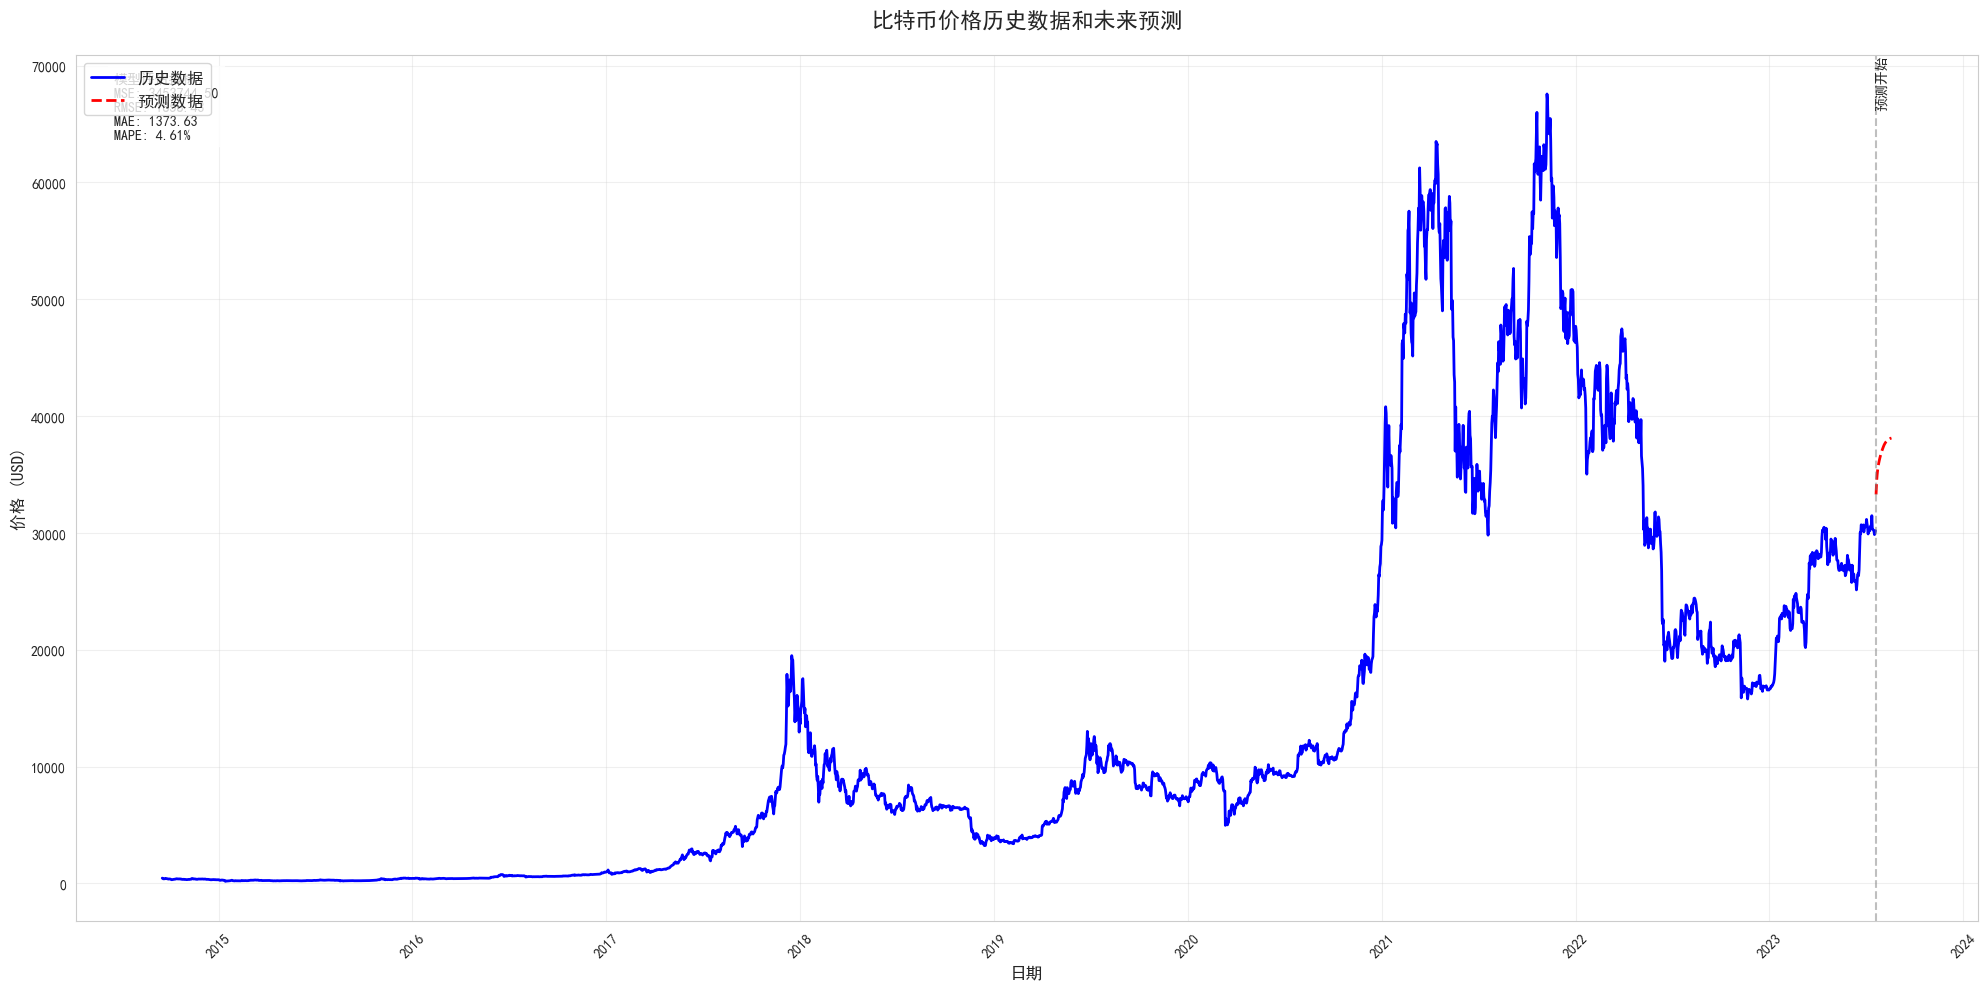

模型已保存至 model/btc_lstm_model.pth
正在进行长期预测...


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]
Font 'default' does not have a glyph for '\u9884' [U+9884], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d4b' [U+6d4b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u8303' [U+8303], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u56f4' [U+56f4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9884' [U+9884], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d4b' [U+6d4b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u8303' [U+8303], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u56f4' [U+56f4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9884' [U+9884], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d4b' [U+6d4b], substituting with a dummy symbol.
Font 'defa

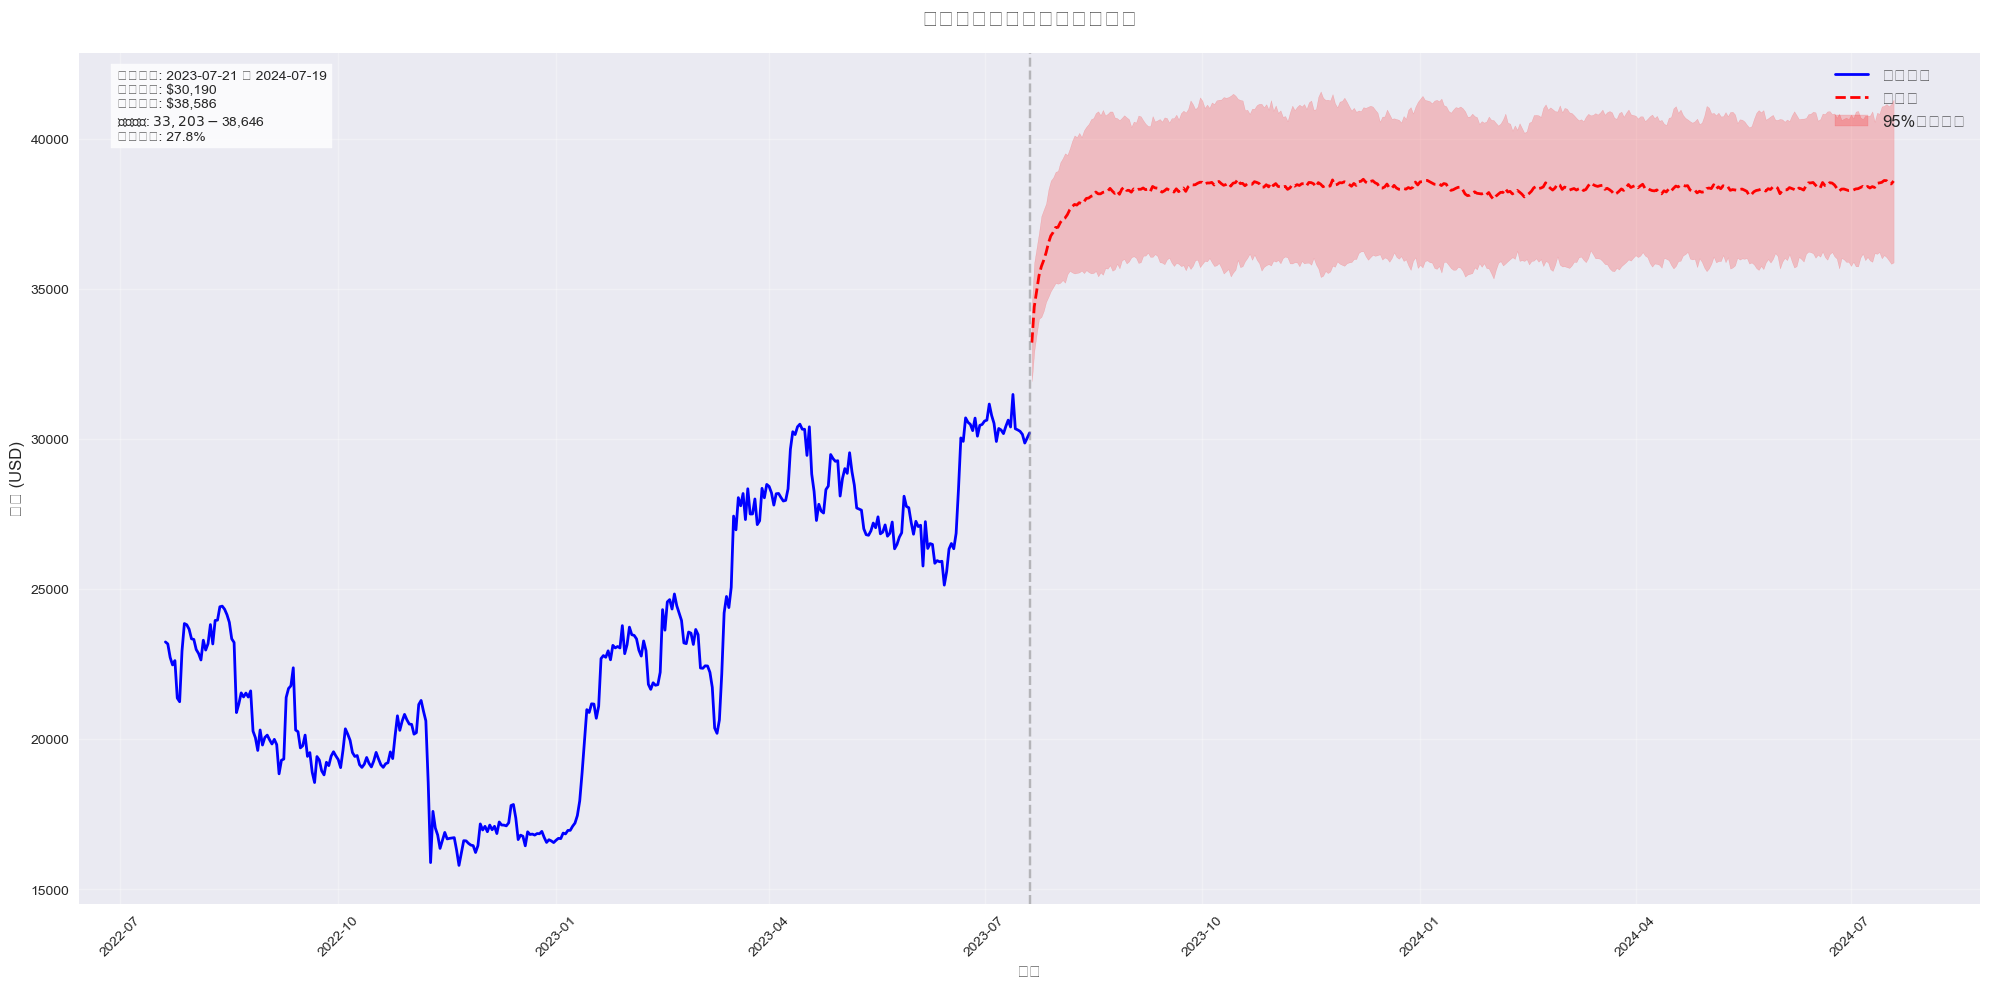

In [2]:
import pandas as pd
from btc_lstm_handler import BTCLSTMHandler
from visualization import plot_complete_prediction

# 加载数据
df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

# 初始化处理器
handler = BTCLSTMHandler()

# 准备数据
train_loader, test_loader, test_data = handler.prepare_data(df)

# 训练模型
train_losses = handler.train(train_loader)

# 评估
predictions, actuals, attention_weights, metrics = handler.evaluate(test_loader)

# 预测未来30天
future_dates, future_predictions, attention_weights = handler.predict_future(df, days=30)

# 绘制结果
plot_complete_prediction(df, future_dates, future_predictions, metrics=metrics)

# 保存模型
handler.save_model()


平稳性检验结果:

log_price:
ADF统计量: -0.9071
p值: 0.7856
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5672

log_volume:
ADF统计量: -1.5724
p值: 0.4975
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673


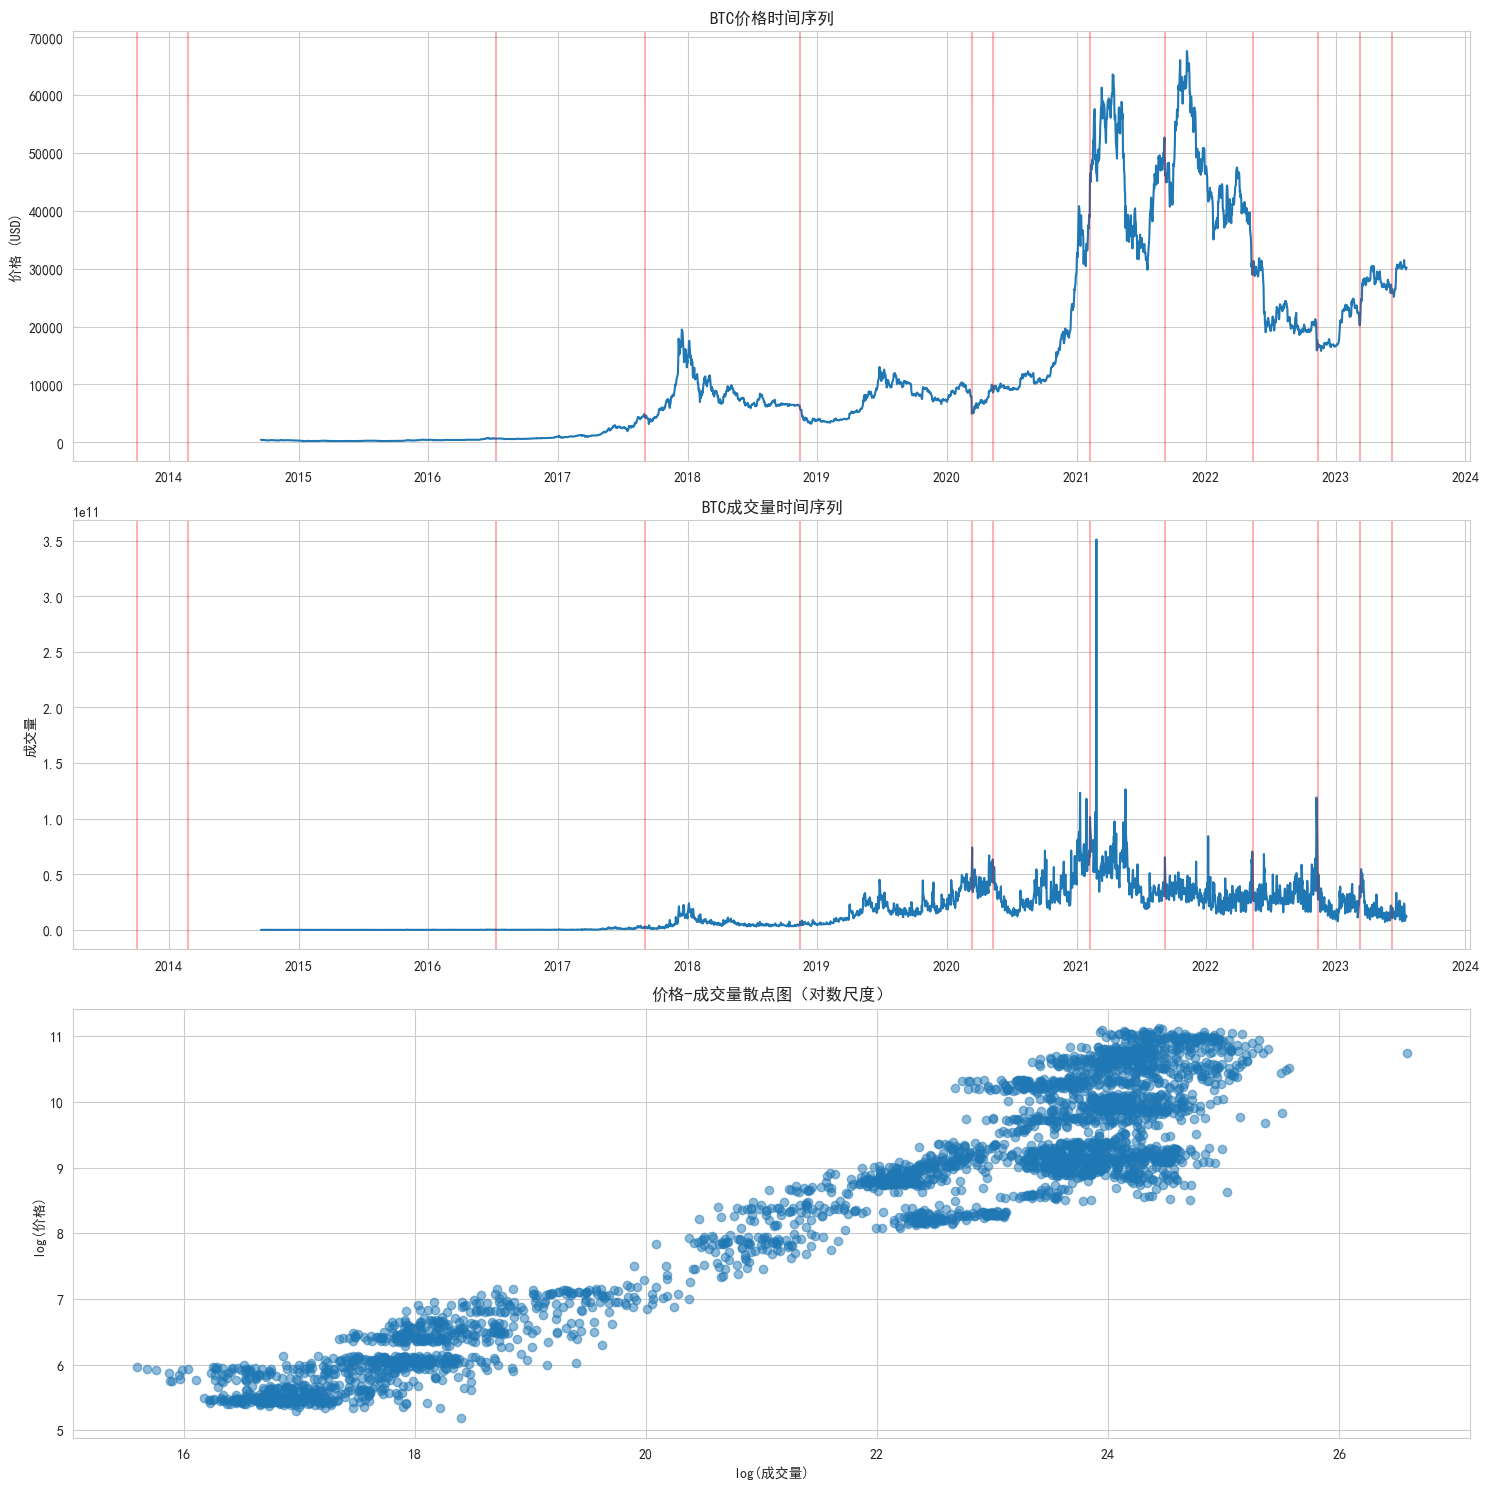

In [1]:
import pandas as pd
from multivariate_analysis import BTCMultivariateAnalysis

# 定义重大事件
events = {
    "2013-10-02": ("首个丝绸之路被查封", "FBI关闭丝绸之路，缴获26000个比特币"),
    "2014-02-24": ("Mt.Gox破产", "最大交易所Mt.Gox宣布破产，损失85万个比特币"),
    "2016-07-09": ("比特币减半", "第二次减半，区块奖励从25降至12.5 BTC"),
    "2017-09-04": ("中国禁止交易", "中国禁止ICO"),
    "2018-11-15": ("BCH硬分叉", "比特币现金分叉为BCHABC和BCHSV"),
    "2020-03-12": ("黑色星期四", "比特币暴跌50%，跌至3800美元"),
    "2020-05-11": ("第三次减半", "区块奖励从12.5降至6.25 BTC"),
    "2021-02-08": ("特斯拉购买", "特斯拉宣布购买15亿美元比特币"),
    "2021-09-07": ("萨尔瓦多", "萨尔瓦多将比特币列为法定货币"),
    "2022-05-12": ("Luna崩溃", "UST/Luna生态系统崩溃"),
    "2022-11-11": ("FTX破产", "全球第二大加密货币交易所FTX申请破产"),
    "2023-03-10": ("硅谷银行", "硅谷银行破产引发金融动荡"),
    "2023-06-10": ("BlackRock", "贝莱德申请比特币现货ETF")
}

# 加载数据
df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

# 初始化分析器
analyzer = BTCMultivariateAnalysis(df, events)

# 数据预处理
df_processed = analyzer.preprocess_data()

# 检查平稳性
stationarity_results = analyzer.check_stationarity()
print("\n平稳性检验结果:")
for variable, results in stationarity_results.items():
    print(f"\n{variable}:")
    print(f"ADF统计量: {results['adf_statistic']:.4f}")
    print(f"p值: {results['p_value']:.4f}")
    print("临界值:")
    for key, value in results['critical_values'].items():
        print(f"\t{key}: {value:.4f}")

# 绘制初始分析图
analyzer.plot_initial_analysis()